<a href="https://colab.research.google.com/github/amohd63/ENCS5141-INTELLIGENT-SYSTEMS-LAB/blob/main/Manual_ENCS5141_Exp3_case_study_3_1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Case Study 3.1**
In this case study, you will perform essential data preprocessing steps on the Penguins dataset. The dataset contains information about different species of penguins, including their physical characteristics and the region where they were observed. Your goal is to prepare the dataset for machine learning analysis. Follow these steps:
1. Load the penguins dataset using the code snippet provided below.
2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.
3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.
4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection technques.
5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.
6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.
7. Scale or normalize the numerical features to ensure consistent scaling across variables.
8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.
9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data (before feature filtering, transformation, and reduction) to ensure that preprocessing has improved model performance.







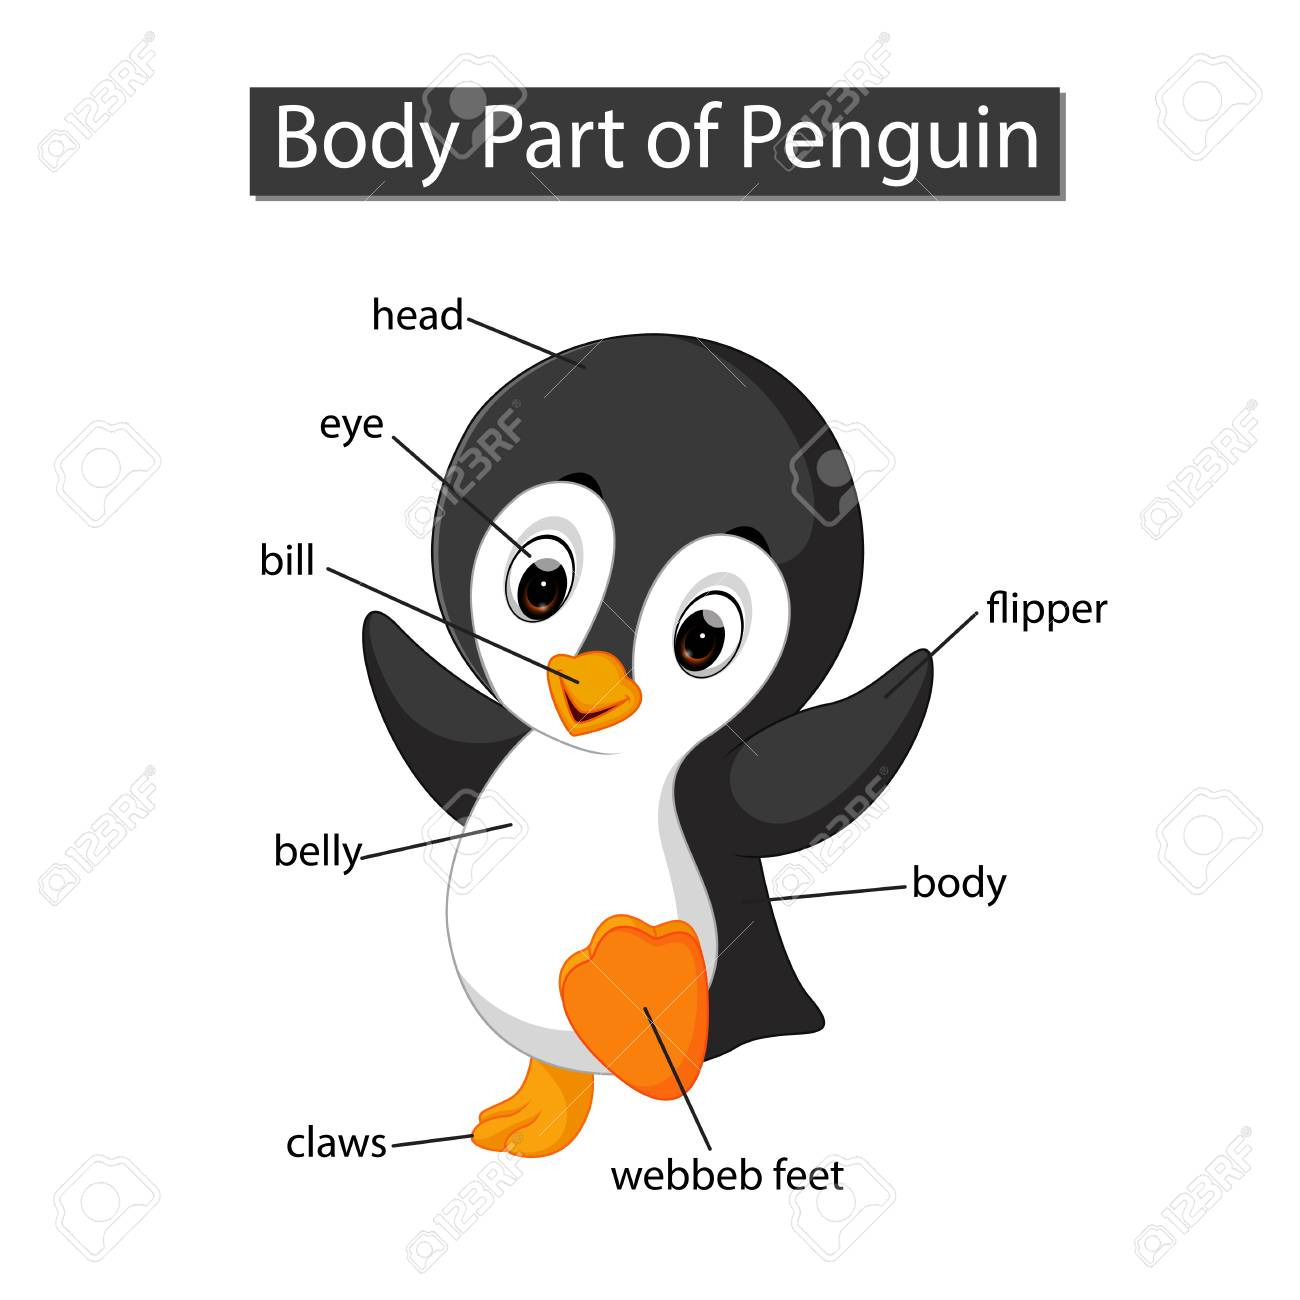

## 1. Load the penguins dataset using the code snippet provided below.

In [ ]:
# Import the 'load_dataset' function from seaborn to load the penguins dataset
from seaborn import load_dataset

# Load the penguins dataset and store it in the 'df' DataFrame
df = load_dataset('penguins')

# Display the first few rows of the DataFrame to get an initial look at the data
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


We loaded the required dataset, then we displayed the first few rows in order to take a quick look at the data. It's clear that we got **missing values**. Also, we have ***7 columns***: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex.

## 2. Perform initial data exploration to understand the dataset's structure, features, and any missing values. Summarize the dataset's statistics and gain insights into the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### **2.1 Data exploration**

#### **2.2.1 Dataset structure**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The function info() returns the columns of the dataframe and their corresponding non-null values count with other information such as data type. Now we will analyze the displayed information:

*   $Entries$: the number of samples/examples in the dataset.
*   $Data$ $columns$: the number of features in the dataset.

Now, the table shows the features with their names, the number of non-null examples, and the type of its data.

The features we have in the dataset: *species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex*.

---

The number of **features** is **7**.

The number of **samples** is **344**.

---

#### **2.2.2 Data Visualization**

We will provide informational graphs to visualize the features and  understand the relationships between them. We will start with simple graphs.

<Axes: xlabel='species'>

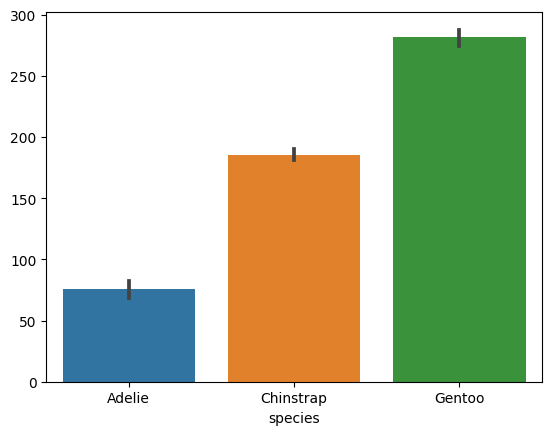

In [ ]:
sns.barplot(data=df, x="species", y=df.species.index)

This is the distrubtion of **species**. It consists of three types: **Adelie, Chinstrap, Gentoo**. The most frequent one is **'Gentoo'**.

<Axes: xlabel='island'>

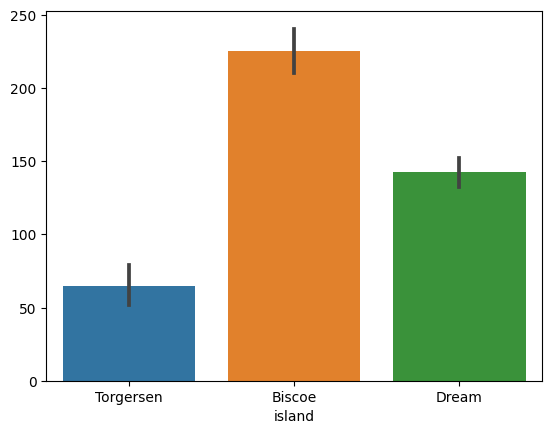

In [ ]:
sns.barplot(data=df, x="island", y=df.island.index)

This is the distrubtion of **island**. It consists of three types: **Torgersen, Biscoe, Dream**. The most frequent one is **'Biscoe'**.

<Axes: xlabel='sex'>

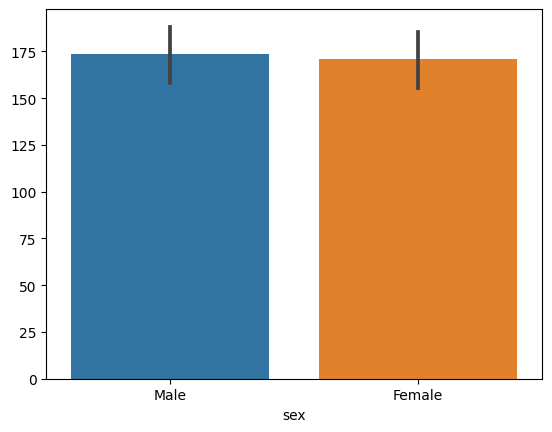

In [ ]:
sns.barplot(data=df, x="sex", y=df.sex.index)

This is the distrubtion of **sex**. It consists of two types: **Male and Female**. The number of males is a bit greater than females.

<Axes: xlabel='species'>

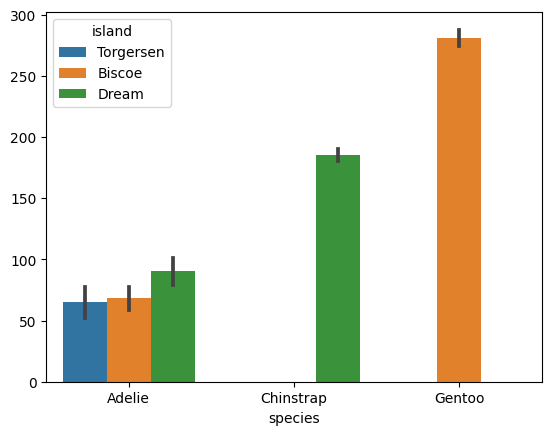

In [ ]:
sns.barplot(data=df, x="species", y=df.species.index, hue="island")

The graph shows the distrubtion of species according to the island. It is obvious that **Chinstrap** lives in island **Dream** only. While **Gentoo** lives in **Biscoe**. As well as, **Adelie** live in **Torgersen, Biscoe, & Dream**, but mostly in **Dream**.

---

<Axes: xlabel='species'>

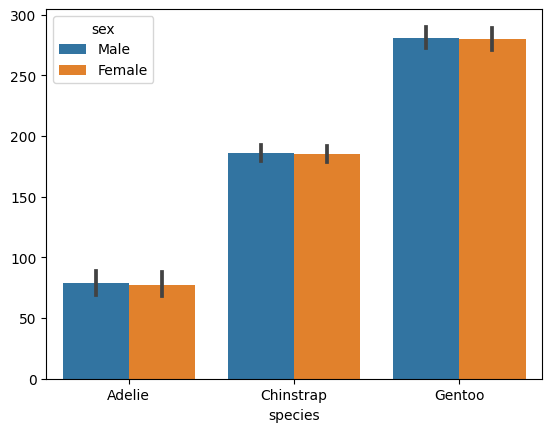

In [ ]:
sns.barplot(data=df, x="species", y=df.species.index, hue="sex")

The graph demonstrates the distrubtion of the species with respect to its gender. All types mostly have the same distrubtion for both genders.

---

<Axes: xlabel='island'>

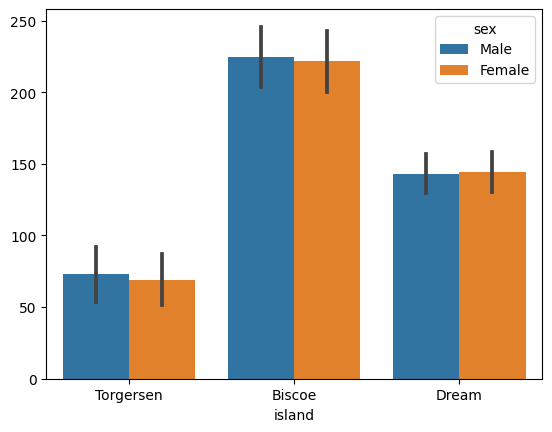

In [ ]:
sns.barplot(data=df, x="island", y=df.island.index, hue="sex")

The graph demonstrates the distrubtion of the islands with respect to species gender. All islands mostly have the same distrubtion for both genders.

---

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

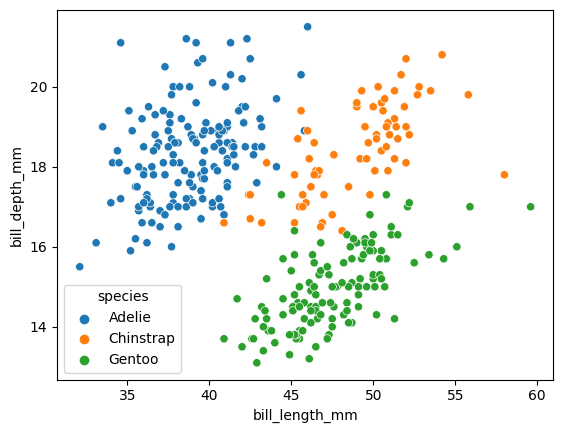

In [ ]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species")

The graph shows the relation between **bill_length** and **bill_depth** with respect to the species types, it is clear that we three groups/clusters.



*   **Adelie**: the bill legnth ranges 30 up to 40, and the depth from 16 - 22. *Both range are (approximation)*.
*   **Chinstrap**: the bill legnth ranges 40 up to 60, and the depth from 16 - 22. *Both range are (approximation)*.
*   **Gentoo**: the bill legnth ranges 40 up to 60, and the depth from 12 - 16. *Both range are (approximation)*.


---

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

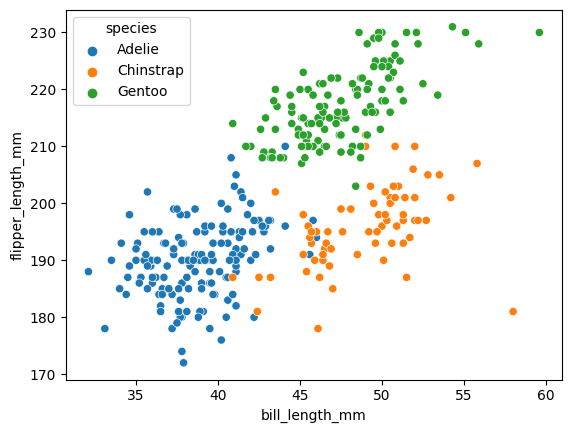

In [ ]:
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue="species")

Same as before, we can split the dataset with these features to three groups or clusters easily.

---

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

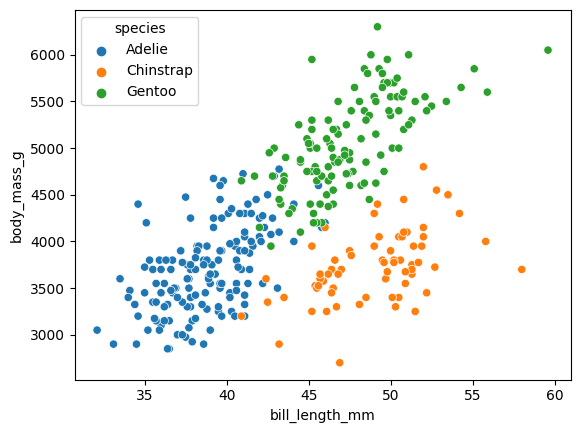

In [ ]:
sns.scatterplot(data=df, y="body_mass_g", x="bill_length_mm", hue="species")

Same as before, the dataset can be splitted to three groups.

---

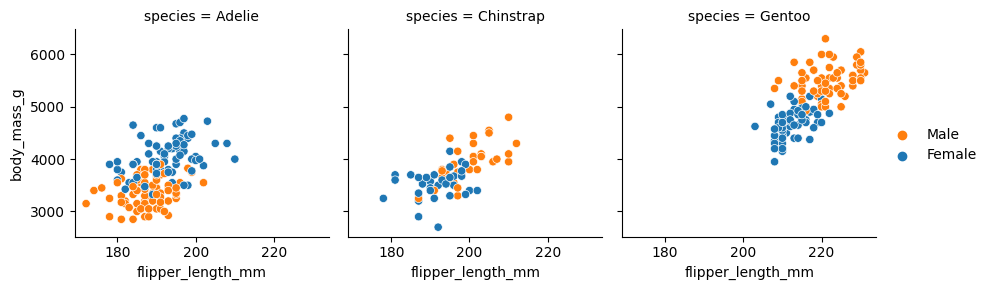

In [ ]:
plot = sns.FacetGrid(df, col="species")
plot.map_dataframe(sns.scatterplot, x="flipper_length_mm", y="body_mass_g", hue="sex")
plot.add_legend()

These plots shows the distribution of species gender in the relationship between flipper length vs. body mass for each type of species.

---

#### **2.2.3 Descriptive Statistics**

In [ ]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The functions describe() provides a list of statical values such as: count, mean, std, min, max, and percentiles.



*   Count: the number of values in the column
*   Mean: the average value of the data.
*   Standard Deviation (STD): The square root of the variance, indicating the spread of data.
*   Min: finds the smallest value in the column.
*   Max: finds the greatest value in the column.
*   Percentiles: Values below which a given percentage of data falls, 25%, 50%, 75%.





##### **2.2.3.1 Central tendency**

The following measures are employed to assess the central tendency of a distribution of data: \
**Mean**: The average value of the data. \
**Median**: The middle value when the data is sorted. \
**Mode**: The value that appears most frequently in the data. \
Pandas provides methods like **mean()**, **median()**, and **mode()** to calculate these measures.

In [ ]:
# Calculate the mean for each column in the DataFrame
Mean = df.mean()
print(f"Mean values: {Mean.values}\n")

# Calculate the median for each column in the DataFrame
Median = df.median()
print(f"Median values: {Median.values}\n")

# Calculate the mode for each column in the DataFrame
Mode = df.mode().values
print(f"Mode values: {Mode}\n")

Mean values: [  43.92192982   17.15116959  200.91520468 4201.75438596]

Median values: [  44.45   17.3   197.   4050.  ]

Mode values: [['Adelie' 'Biscoe' 41.1 17.0 190.0 3800.0 'Male']]



<ipython-input-15-8eafc63d44e4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mean = df.mean()
<ipython-input-15-8eafc63d44e4>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Median = df.median()


To gain a visual understanding of the central tendency measures of the loaded data, we can utilize the **sns.histplot()** method to display the column distributions of the dataset.

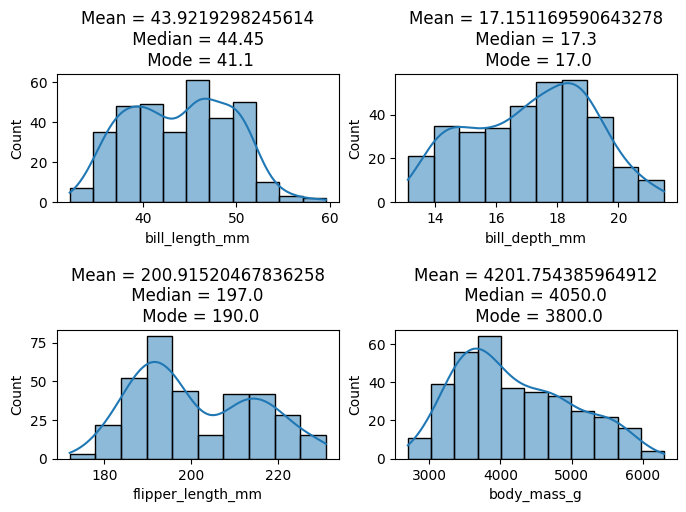

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(8, 5),ncols=2,nrows=2)

#Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="bill_length_mm", ax=axs[0,0], kde=True)
axs[0,0].set_title(f"Mean = {Mean[0]}\n Median = {Median[0]} \n Mode = {Mode[0,2]}")

sns.histplot(data=df, x="bill_depth_mm", ax=axs[0,1], kde=True)
axs[0,1].set_title(f"Mean = {Mean[1]}\n Median = {Median[1]} \n Mode = {Mode[0,3]}")

sns.histplot(data=df, x="flipper_length_mm", ax=axs[1,0], kde=True)
axs[1,0].set_title(f"Mean = {Mean[2]}\n Median = {Median[2]} \n Mode = {Mode[0,4]}")

sns.histplot(data=df, x="body_mass_g", ax=axs[1,1], kde=True)
axs[1,1].set_title(f"Mean = {Mean[3]}\n Median = {Median[3]} \n Mode = {Mode[0,5]}")

fig.subplots_adjust(hspace=1)

Let's study the plots above:


*   **Bill length**: it is close to a summation of two **normal** distributions, but the **mode** is slightly far from **mean & median**.
*   **Bill depth**: Same as bill length, but the three measures are very close to each other, it could be a gaussian distribution.
*   **Flipper length**: from the measures, it is not likely to be a normal distribution.
*   **Body mass**: same as flipper length.

With these measures (**mean, median, mode**), we are unable to confirm that the distributions are normal (gaussian), we should use other measures.

##### **2.2.3.2 Variation**

The subsequent metrics are utilized to evaluate the dispersion of data distribution:\
**Variance**: A measure of how much the data points deviate from the mean.\
**Standard Deviation**: The square root of the variance, indicating the spread of data. \
Pandas provides functions such as **var()** and **std()** for computing the variance and standard deviation of columns within the DataFrame.

In [ ]:
# Calculate the variance for each column in the DataFrame
Variance = df.var()
print(f"Variance values: {Variance.values}\n")

# Calculate the standard deviaton for each column in the DataFrame
STD = df.std()
print(f"Standard deviation values: {STD.values}\n")

Variance values: [2.98070543e+01 3.89980801e+00 1.97731792e+02 6.43131077e+05]

Standard deviation values: [  5.45958371   1.97479316  14.06171368 801.9545357 ]



<ipython-input-17-d65a872dde3c>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Variance = df.var()
<ipython-input-17-d65a872dde3c>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  STD = df.std()


Again, let us use the use the **sns.histplot()** method to gain a visual understanding of the variation measures of the loaded data.

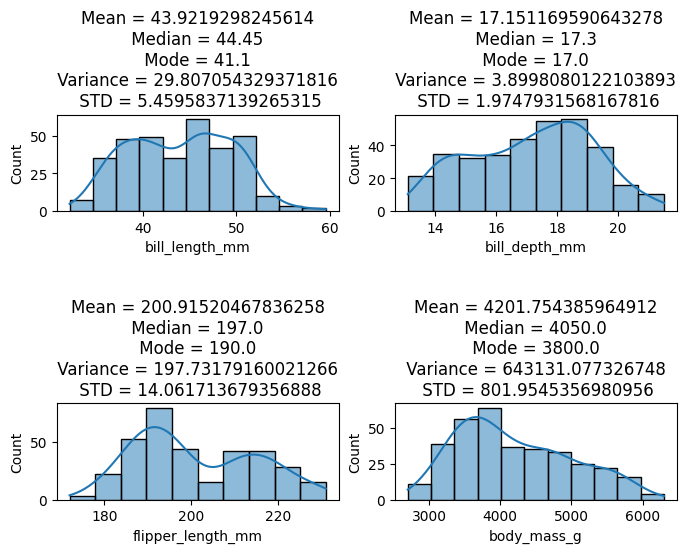

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(figsize=(8, 5),ncols=2,nrows=2)

#Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="bill_length_mm", ax=axs[0,0], kde=True)
axs[0,0].set_title(f"Mean = {Mean[0]}\n Median = {Median[0]} \n Mode = {Mode[0,2]} \n Variance = {Variance[0]} \n STD = {STD[0]}")

sns.histplot(data=df, x="bill_depth_mm", ax=axs[0,1], kde=True)
axs[0,1].set_title(f"Mean = {Mean[1]}\n Median = {Median[1]} \n Mode = {Mode[0,3]} \n Variance = {Variance[1]} \n STD = {STD[1]}")

sns.histplot(data=df, x="flipper_length_mm", ax=axs[1,0], kde=True)
axs[1,0].set_title(f"Mean = {Mean[2]}\n Median = {Median[2]} \n Mode = {Mode[0,4]} \n Variance = {Variance[2]} \n STD = {STD[2]}")

sns.histplot(data=df, x="body_mass_g", ax=axs[1,1], kde=True)
axs[1,1].set_title(f"Mean = {Mean[3]}\n Median = {Median[3]} \n Mode = {Mode[0,5]} \n Variance = {Variance[3]} \n STD = {STD[3]}")

fig.subplots_adjust(hspace=2)

Let's study the plots above:


*   **Bill length**: it has a moderate variance and standard deviation, suggesting moderate spread around the mean.
*   **Bill depth**: it has a low variance and standard deviation, indicating that the values are clustered closely around the mean.
*   **Flipper length**: it has a higher variance and standard deviation compared to the previous variables, indicating more spread around the mean.
*   **Body mass**: it has a significantly higher variance and standard deviation, suggesting considerable variability or dispersion around the mean, possibly due to outliers or a non-normal distribution.

Overall, these statistical values provide insights into the central tendency, spread, and symmetry of the distributions for each variable, helping to understand their characteristics and potential patterns in the data.

##### **2.2.3.3 Shape of Distribution**

Skewness and kurtosis are statistical measures that provide insights into the shape of a distribution:
Skewness: Measures the asymmetry of the data distribution.
Kurtosis: Measures the peakedness of the data distribution.
If you need to calculate skewness and kurtosis for multiple columns or across the entire DataFrame, you can use df.skew() and df.kurtosis() without specifying a column name. These functions return Series with the skewness or kurtosis values for each column.

<ipython-input-19-263a320aa794>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Skewness = df.skew()
<ipython-input-19-263a320aa794>:6: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Kurtosis = df.kurtosis()


Skewness values: [ 0.05311807 -0.14346463  0.34568183  0.47032933]

Kurtosis values: [-0.87602697 -0.90686609 -0.98427289 -0.71922187]



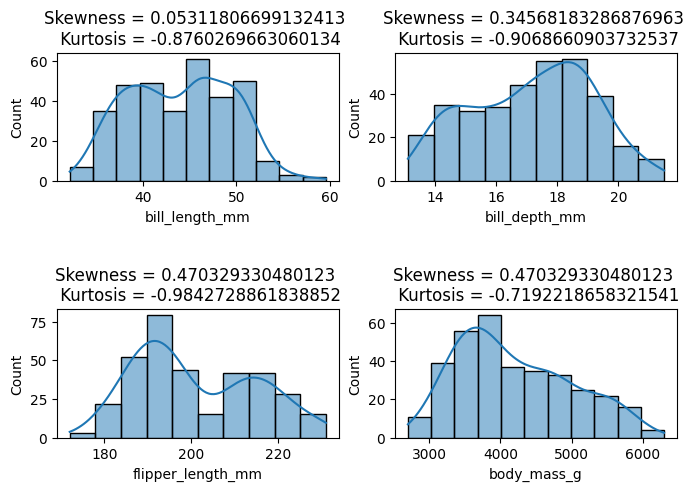

In [ ]:
# Calculate the Skewness for each column in the DataFrame
Skewness = df.skew()
print(f"Skewness values: {Skewness.values}\n")

# Calculate the Kurtosis for each column in the DataFrame
Kurtosis = df.kurtosis()
print(f"Kurtosis values: {Kurtosis.values}\n")

fig, axs = plt.subplots(figsize=(8, 5),ncols=2,nrows=2)

#Create histograms displaying the distribution of specific column values and incorporate the actual distribution curve.
sns.histplot(data=df, x="bill_length_mm", ax=axs[0,0], kde=True)
axs[0,0].set_title(f"Skewness = {Skewness[0]} \n Kurtosis = {Kurtosis[0]}")

sns.histplot(data=df, x="bill_depth_mm", ax=axs[0,1], kde=True)
axs[0,1].set_title(f"Skewness = {Skewness[2]} \n Kurtosis = {Kurtosis[1]}")

sns.histplot(data=df, x="flipper_length_mm", ax=axs[1,0], kde=True)
axs[1,0].set_title(f"Skewness = {Skewness[3]} \n Kurtosis = {Kurtosis[2]}")

sns.histplot(data=df, x="body_mass_g", ax=axs[1,1], kde=True)
axs[1,1].set_title(f"Skewness = {Skewness[3]} \n Kurtosis = {Kurtosis[3]}")

fig.subplots_adjust(hspace=1)

Let's study the results above:

*   All variables have negative kurtosis values, suggesting that they have lighter tails than a normal distribution.
*   **Bill length** is nearly symmetric with a skewness close to 0.
*   **Bill depth** is slightly negatively skewed.
*   **Flipper length** and **Body mass** are positively skewed.

These values collectively describe the shape and characteristics of the distributions for each variable. Negative kurtosis indicates relatively less extreme values compared to a normal distribution, while skewness helps understand the asymmetry in the data distribution. These values can assist in identifying deviations from normality and understanding the nature of the data distributions.

##### **2.2.3.4 Quantiles**

**Percentiles**: Values below which a given percentage of data falls. \
**Interquartile Range (IQR)**: The range between the 25th and 75th percentiles. \
Pandas offers the **quantile()** method for calculating percentiles. For instance, to obtain the 75th percentile, employ quantile(0.75), and for the 25th percentile, utilize quantile(0.25). Similarly, to compute the interquartile range (IQR), you can apply the formula quantile(0.75) - quantile(0.25). This is demonstrated in the code snippet below.

In [ ]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['bill_length_mm'].quantile(0.25)
percentile_75 = df['bill_length_mm'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

25th Percentile: 39.225
75th Percentile: 48.5
Interquartile Range (IQR): 9.274999999999999


* The 25th percentile (Q1) of 39.225 indicates that a quarter of the dataset's values lie below this point.

* The 75th percentile (Q3) at 48.5 shows that three-quarters of the dataset's values are less than or equal to this value.

* The IQR of approximately 9.275 suggests that the middle 50% of the data falls within this range, showing the spread of the central data points.

In summary, these quartile values and the IQR help understand the spread and dispersion of the central portion of the dataset, offering insights into its variability without being influenced by extreme values (outliers).

## 3. Address any data quality issues, such as missing values and outliers. Decide on an appropriate strategy for handling missing data, such as imputation or removal of rows/columns.

### **3.1 Detecting missing values**

Display general info about the dataset, and to find which columns got missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


From the first sight, it is clear that (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex) columns got missing values.

---

Finds the number of missing values in each column.

In [ ]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We have some missing values in the dataset.



*   **species & island**: has no missing values.
*   **bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g**: each feature has 2 missing values.
*   **sex**: has 11 missing values.



---

Check if the dataset has an empty rows **(full empty)**.

In [ ]:
print(f"Number of empty records = {df.isnull().all(axis=1).sum()}")
df[df.isnull().all(axis=1)]

Number of empty records = 0


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


Displays the rows that contain empty values.

In [ ]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's noticeable that there are two rows that have **2** values filled out from **7**.

---

We have multiple features with missing values, in the following step we will discuess how to handle these features.

### **3.2 Handling missing data**

#### **3.2.1 Handling Missing Data Through Dropping**

We have two samples filled with two features only out of 7. The percentage of used features is **(28.57%)**. The proportion of samples is **(0.58%)**. The proportion of the samples is very small and unnoticeable, so dropping them won't make any problem.

In [ ]:
# Calculate the NaN percentage for each row
nan_percentages = df.isna().mean(axis=1)

# Set a threshold percentage for NaN values
thresh = 0.7

# Drop rows with NaN percentage above the threshold
df = df[nan_percentages < thresh]

First, we find the percentage of null values in each row (sample). If this percentage exceeds the defined threshold (0.7, 70%), then the row will be dropped. Or, simply we can drop them depending on the proportion of the samples.

---

Alternatively, dropping them due to the proportion.

In [ ]:
df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

<ipython-input-26-1c46cc95a271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)


**Once again**, display rows that have empty values

In [ ]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It's clear that the two rows were dropped **sucessfully**.

---

Now, let's check again the columns that got empty values.

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

Now, only **sex** feature has null values.

---

#### **3.2.2 Handling Missing Data Through Imputation**

The targeted feature is **sex**.

First of all, we will find the percentage of males and females.

In [ ]:
print(df.groupby('sex')['species'].count() / df['sex'].shape[0])

sex
Female    0.482456
Male      0.491228
Name: species, dtype: float64


From the first sight, the percentage of both genders are close.

---

Now, we will find the correlation between the features in order to decide which feature to use in order to impute the **sex feature**.

<Axes: >

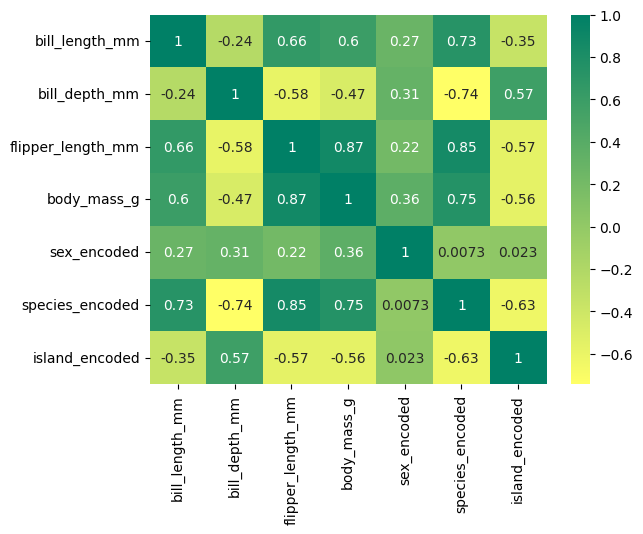

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create a copy of the original DataFrame to mainting the original DataFrame
df_corr=df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_corr['sex_encoded'] = label_encoder.fit_transform(df_corr['sex'])
df_corr['species_encoded'] = label_encoder.fit_transform(df_corr['species'])
df_corr['island_encoded'] = label_encoder.fit_transform(df_corr['island'])


# Drop categorical features
df_corr.drop(['sex','species', 'island'],axis=1,inplace=True)

correlation = df_corr.corr()
sns.heatmap(correlation, annot=True, cmap = 'summer_r')

**Sex** feature is highly correlated with **body_mass_g** feature, so we will use it to impute the missing values.

---

We will plot **body_mass_g** according to the gender.

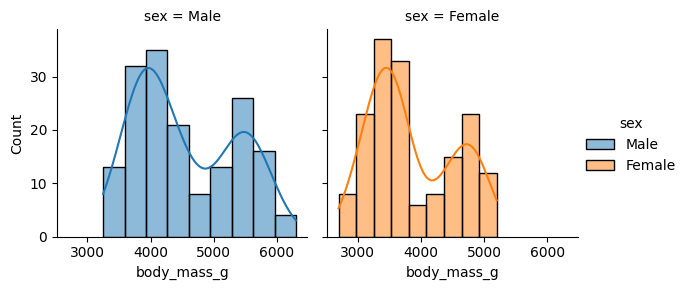

In [ ]:
plot = sns.FacetGrid(df, col="sex", hue='sex')
plot.map_dataframe(sns.histplot, x="body_mass_g", kde=True)
plot.add_legend()

In [ ]:
print('Mean: \n', df.groupby('sex')['body_mass_g'].mean(), '\n')
print('Median: \n', df.groupby('sex')['body_mass_g'].median(), '\n')
print('Mode: \n', df.groupby('sex')['body_mass_g'].agg(pd.Series.mode), '\n')
print('STD: \n', df.groupby('sex')['body_mass_g'].std(), '\n')
print('Skewness: \n', df.groupby('sex')['body_mass_g'].skew(), '\n')
print('Kurtosis: \n', df.groupby('sex')['body_mass_g'].apply(pd.DataFrame.kurt), '\n')

Mean: 
 sex
Female    3862.272727
Male      4545.684524
Name: body_mass_g, dtype: float64 

Median: 
 sex
Female    3650.0
Male      4300.0
Name: body_mass_g, dtype: float64 

Mode: 
 sex
Female              3700.0
Male      [3900.0, 3950.0]
Name: body_mass_g, dtype: object 

STD: 
 sex
Female    666.172050
Male      787.628884
Name: body_mass_g, dtype: float64 

Skewness: 
 sex
Female    0.445063
Male      0.376064
Name: body_mass_g, dtype: float64 

Kurtosis: 
 sex
Female   -1.119924
Male     -1.204163
Name: body_mass_g, dtype: float64 



Based on the provided statistics:

* Mean vs. Median vs. Mode: For both genders (Female and Male), the mean, median, and mode values are not too different from each other, suggesting a potential tendency towards normality.

* Skewness and Kurtosis: The skewness and kurtosis values for both genders are close to 0. Skewness values around 0 (less than ±0.5) indicate relatively symmetric distributions, and kurtosis values around -1 to +1 indicate near-normal or mesokurtic distributions.

Given these statistics, both genders show characteristics that suggest a tendency toward normality in body mass distribution.

So, the choice between **mean & median**, in our case the **mean & median** values for both genders are relatively close to each other. Still, until now, we don't know anything about outliers. So, using the **median** is better.

---

**Imputation**: we will impute the missing values according to the **median** value. However, our threshold is the summation of the male and female body_mass_g medians divided by 2.


thresh = (f_median + m_median)/2

Now, we should decide how to use this threshold.

In [ ]:
medians = df.groupby('sex')['body_mass_g'].median()
thresh = (medians['Male'] + medians['Female'])/2

M_G = df.loc[(df['body_mass_g'] >= thresh) & (df['sex'] == 'Male')].shape[0]
M_L = df.loc[(df['body_mass_g'] < thresh) & (df['sex'] == 'Male')].shape[0]
F_G = df.loc[(df['body_mass_g'] >= thresh) & (df['sex'] == 'Female')].shape[0]
F_L = df.loc[(df['body_mass_g'] < thresh) & (df['sex'] == 'Female')].shape[0]

print(f'% of males >= threshold: {M_G/(M_G + M_L) * 100} %')
print(f'% of males < threshold: {M_L/(M_G + M_L) * 100} %')
print(f'% of females >= threshold: {F_G/(F_G + F_L) * 100} %')
print(f'% of females < threshold: {F_L/(F_G + F_L) * 100} %')

% of males >= threshold: 68.45238095238095 %
% of males < threshold: 31.547619047619047 %
% of females >= threshold: 35.15151515151515 %
% of females < threshold: 64.84848484848484 %


It is obvious that most males are greater than the body mass threshold, where most females are lesser than.

So, any value greater than or equal this threshold is considered male, otherwise it is a female.

In [ ]:
import pandas as pd

medians = df.groupby('sex')['body_mass_g'].median()

thresh = (medians['Male'] + medians['Female'])/2

# Create a copy of the df DataFrame where the body_mass_g feature is greater or equal to 167
df_G = df.loc[df['body_mass_g'] >= thresh].copy()

# Create a copy of the df DataFrame where the body_mass_g feature is less that 167
df_L = df.loc[df['body_mass_g'] < thresh].copy()

# Fill the sex missing values in the df_G by male
df_G['sex'].fillna(value='Male', inplace=True)

# Fill the sex missing values in the df_L by female
df_L['sex'].fillna(value='Female', inplace=True)

# Reconstruct the df DataFrame by concatinaing the three sub Dataframes; df_L, df_G, and df_NaN
df = pd.concat([df_L, df_G], axis=0)

print('The distribution of sex categories in the DataFrame following the replacement of missing values.')
print(df.groupby('sex')['species'].count() / df['sex'].shape[0])

print('\n\nInformation about the DataFrame')
print(df.isnull().sum())

The distribution of sex categories in the DataFrame following the replacement of missing values.
sex
Female    0.494152
Male      0.505848
Name: species, dtype: float64


Information about the DataFrame
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


The percentages of sex feature before and after imputation.

**Before**

* Female    0.482456

* Male      0.491228

**After**

* Female    0.494152

* Male      0.505848

Difference Before = 0.491228-0.482456 = 0.008772

Difference After = 0.505848-0.494152 = 0.011696

Difference between them = 0.002924 (0.2924%)

The increase of male percentage is neglectable.

---

Now, we finished filling the missing values.

### **3.3 Detecting outliers**

We have different ways to detect outliers such as: boxplot, interquartile range, and z-score.

---

#### Detecting **[bill_length_mm]** outliers

First method, detecting outliers using boxplot.

<Axes: >

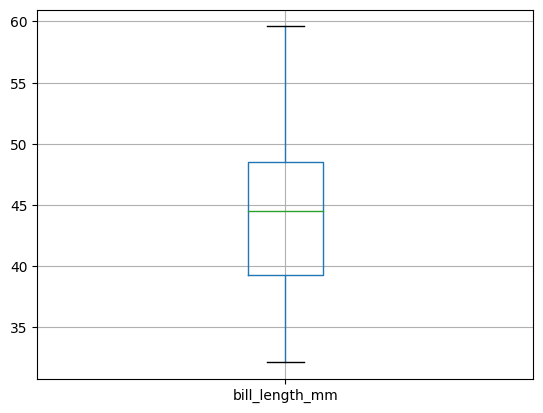

In [ ]:
df.boxplot(column=['bill_length_mm'])

It is clear that this feature doesn't have any outlier. But, we will use another way (**interquartile range**) to detect outliers.

In [ ]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['bill_length_mm'].quantile(0.25)
percentile_50 = df['bill_length_mm'].quantile(0.5)
percentile_75 = df['bill_length_mm'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_bill_length_mm = percentile_25 - 1.5*iqr
UpperBound_bill_length_mm = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_bill_length_mm}, and Upper Bound = {UpperBound_bill_length_mm}")

25th Percentile: 39.225
50th Percentile: 44.45
75th Percentile: 48.5
Interquartile Range (IQR): 9.274999999999999
Lower Bound = 25.312500000000004, and Upper Bound = 62.412499999999994


In [ ]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['bill_length_mm'] < LowerBound_bill_length_mm) | (df['bill_length_mm'] > UpperBound_bill_length_mm)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


#### Detecting **[bill_depth_mm]** outliers

<Axes: >

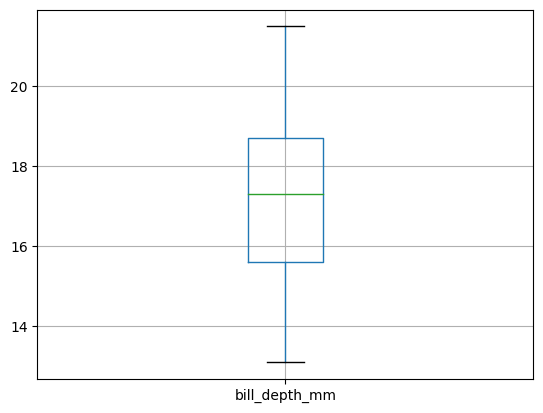

In [ ]:
df.boxplot(column=['bill_depth_mm'])

As mentioned before, this feature doesn't contain any outlier.

In [ ]:
mean=df['bill_depth_mm'].mean()
std=df['bill_depth_mm'].std()
print(f"For the bill_depth_mm feature, the mean = {mean} and standard deviaton = {std} ")

LowerZScore_bill_depth_mm = mean - 2.5*std
UpperZScore_bill_depth_mm = mean + 2.5*std
print(f"Lower Z-Score = {LowerZScore_bill_depth_mm}, and Upper Z-Score = {UpperZScore_bill_depth_mm}")

For the bill_depth_mm feature, the mean = 17.151169590643278 and standard deviaton = 1.9747931568167814 
Lower Z-Score = 12.214186698601324, and Upper Z-Score = 22.08815248268523


In [ ]:
NumRecordsBefore=df.shape[0]
df = df[(df['bill_depth_mm'] >= LowerZScore_bill_depth_mm) & (df['bill_depth_mm'] <= UpperZScore_bill_depth_mm)]
NumRecordsAfter=df.shape[0]
DroppedRecords=NumRecordsBefore-NumRecordsAfter
print(f"Number of detected outliers is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of detected outliers is 0 (0.0%)


#### Detecting **[flipper_length_mm]** outliers

<Axes: >

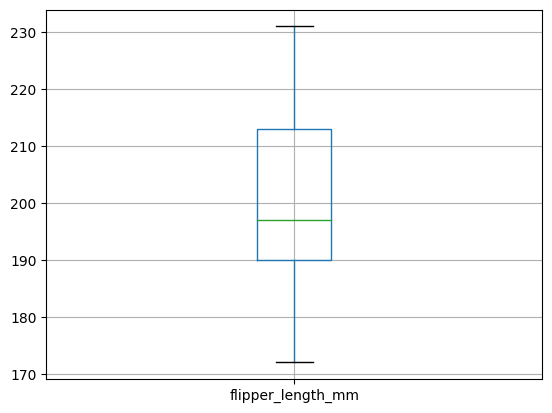

In [ ]:
df.boxplot(column=['flipper_length_mm'])

It's clear from the plot that the feature doesn't contain any outlier.

#### Detecting **[body_mass_g]** outliers

In [ ]:
# Compute percentiles using Pandas quantile() function
percentile_25 = df['body_mass_g'].quantile(0.25)
percentile_50 = df['body_mass_g'].quantile(0.5)
percentile_75 = df['body_mass_g'].quantile(0.75)

print("25th Percentile:", percentile_25)
print("50th Percentile:", percentile_50)
print("75th Percentile:", percentile_75)

# Compute interquartile range (IQR)
iqr = percentile_75 - percentile_25
print("Interquartile Range (IQR):", iqr)

LowerBound_body_mass_g = percentile_25 - 1.5*iqr
UpperBound_body_mass_g = percentile_75 + 1.5*iqr
print(f"Lower Bound = {LowerBound_body_mass_g}, and Upper Bound = {UpperBound_body_mass_g}")

25th Percentile: 3550.0
50th Percentile: 4050.0
75th Percentile: 4750.0
Interquartile Range (IQR): 1200.0
Lower Bound = 1750.0, and Upper Bound = 6550.0


In [ ]:
NumRecordsBefore=df.shape[0]
DroppedRecords=df[(df['body_mass_g'] < LowerBound_body_mass_g) | (df['body_mass_g'] > UpperBound_body_mass_g)].shape[0]
print(f"Number of outliers based on the Interquartile Range and Boxplots is {DroppedRecords} ({100*DroppedRecords/NumRecordsBefore}%)")

Number of outliers based on the Interquartile Range and Boxplots is 0 (0.0%)


We don't have any outlier, also to ensure the confirmed results. We will plot the boxplot to visualize the result.

<Axes: >

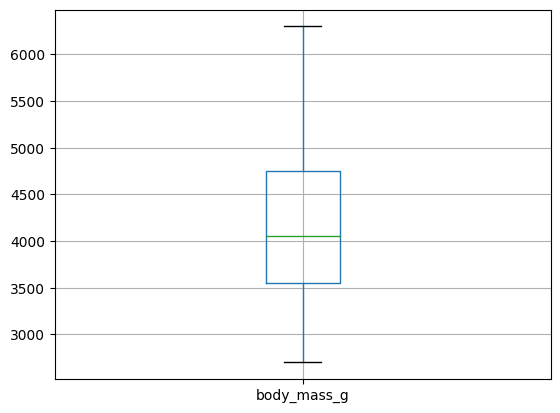

In [ ]:
df.boxplot(column=['body_mass_g'])

## 5. If the dataset contains categorical variables, encode them into a numerical format suitable for machine learning models.

Our dataset contains three categorical features: **species, island, sex**. There are two encoding methods: **One hot encoding**, and **Label encoding**.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical feature
df_encoded['species_encoded'] = label_encoder.fit_transform(df_encoded['species'])
df_encoded['island_encoded'] = label_encoder.fit_transform(df_encoded['island'])
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'])

# Drop categorical features
df_encoded.drop(['species','island', 'sex'],axis=1,inplace=True)

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_encoded,island_encoded,sex_encoded
0,39.1,18.7,181.0,3750.0,0,2,1
1,39.5,17.4,186.0,3800.0,0,2,0
2,40.3,18.0,195.0,3250.0,0,2,0
4,36.7,19.3,193.0,3450.0,0,2,0
5,39.3,20.6,190.0,3650.0,0,2,1


I used label encoder for the three features, because I don't want to increase the number of features in my model, and in our case, there are no difference between them.

## Split the data into X, y

In [ ]:
X, y = df_encoded.drop('species_encoded', axis=1), df_encoded.species_encoded

We splitted the data into input [X] and output [y], our target feature is the **species** of the penguin. It is possible to use other features, but after testing other features, the best accuracy is obtained when using species as the target feature.

## 4. Analyze the relevance of each feature for your machine learning task by using the learned use feature selection techniques.

We have different methods to filter our features: **variance, information gain, chi-squared test, & correlation coefficient**.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply Chi2 test selector
selector = SelectKBest(chi2, k=4)
X_filtered = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Reconstruct DataFrame using the selected features
df_filtered = pd.DataFrame(X_filtered, columns=X.columns[selected_indices])
df_filtered

,bill_length_mm,flipper_length_mm,body_mass_g,island_encoded
0,39.1,181.0,3750.0,2.0
1,39.5,186.0,3800.0,2.0
2,40.3,195.0,3250.0,2.0
3,36.7,193.0,3450.0,2.0
4,39.3,190.0,3650.0,2.0
...,...,...,...,...
337,47.2,214.0,4925.0,0.0
338,46.8,215.0,4850.0,0.0
339,50.4,222.0,5750.0,0.0
340,45.2,212.0,5200.0,0.0


We filtered our features. However, k=4 and k=3 both works and keeps the accuracy 1, but after dimensionality reduction we will have a **drop** in the accuracy when k=3.

---

Filtered features are **sex_encoded & bill_depth_mm**, so we will drop them.

---

Now, we will use a model to measure the accuracy when using k=4.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Apply chi-squared test
selector = SelectKBest(chi2, k=4)
X_train_info_gain = selector.fit_transform(X_train, y_train)
X_test_info_gain = selector.transform(X_test)

# Train a classifier on the selected features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_info_gain, y_train)
y_pred = clf.predict(X_test_info_gain)
accuracy_new = accuracy_score(y_test, y_pred)


print(f"Number of original features: {X_train.shape[1]}")
print(f"Number of features after chi-squared test filtering: {X_train_info_gain.shape[1]}")
print(f"Accuracy of Original features (testing accuracy): {accuracy}")
print(f"Accuracy after chi-squared test filtering (testing accuracy): {accuracy_new}")

Number of original features: 6
Number of features after chi-squared test filtering: 4
Accuracy of Original features (testing accuracy): 1.0
Accuracy after chi-squared test filtering (testing accuracy): 1.0


The accuracy is 1.0 after dropping the two features. However, this is the best case solution because I tried four methods with different parameters.

## 6. Split the dataset into training and testing subsets to evaluate the performance of your machine learning models.

Now, we will split the data into training and testing subsets after **addressing quality issues, encoding features, filtering, and scaling**.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filtered, y, test_size=0.2, random_state=42)

## 7. Scale or normalize the numerical features to ensure consistent scaling across variables.

### **Scaling**

We have two ways to scale the data: **min-max & standardization.** We tend to use standardization.

In [ ]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the DataFrame 'X_train', which computes the minimum and maximum values for scaling
scaler.fit(X_train)

# Transform and scale the data
data = scaler.transform(X_train)

# Create a new DataFrame 'X_train_scaled' to store the scaled data, maintaining column names from 'df'
X_train_scaled = pd.DataFrame(data, columns=X_train.columns)

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=3)

# Fit the KMeans model to the data
km.fit(X_train_scaled)

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(X_train_scaled)

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
X_train_scaled['cluster'] = cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the DataFrame 'X_test', which computes the minimum and maximum values for scaling
scaler.fit(X_test)

# Transform and scale the data
data = scaler.transform(X_test)

# Create a new DataFrame 'X_test_scaled' to store the scaled data, maintaining column names from 'df'
X_test_scaled = pd.DataFrame(data, columns=X_test.columns)

# Create a KMeans object with the desired number of clusters (4 in this case)
km = KMeans(n_clusters=3)

# Fit the KMeans model to the data
km.fit(X_test_scaled)

# Predict the cluster labels for each data point based on the fitted model
cluster = km.predict(X_test_scaled)

# Create a new column 'cluster' in the DataFrame to store the predicted cluster labels
X_test_scaled['cluster'] = cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Both methods are good for our case, but standardization is better after testing both of them. When I used standardization, the randomness in accuracy disappeared.

After that, we will measure the accuracy after scaling the features to ensure the consistency of our data.

In [ ]:
# Train a classifier on the selected features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy_new = accuracy_score(y_test, y_pred)

print(f"Accuracy after scaling (testing accuracy): {accuracy_new}")

Accuracy after scaling (testing accuracy): 1.0


The accuracy is the same.

### **Visualization**

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

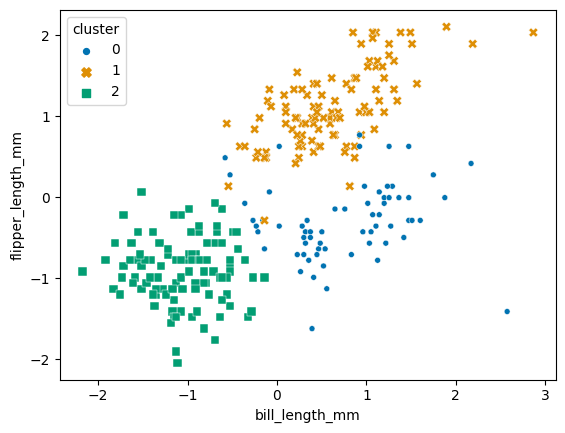

In [ ]:
# Create a scatter plot:
# - x-axis
# - y-axis
# - 'hue' parameter assigns different colors to data points based on the 'cluster' column
# - 'style' parameter assigns different markers/styles to data points based on the 'cluster' column
# - 'size' parameter adjusts the size of data points based on the 'cluster' column
# - 'palette' parameter defines the color palette used for the plot
sns.scatterplot(x=X_train_scaled['bill_length_mm'], y=X_train_scaled['flipper_length_mm'], hue=X_train_scaled['cluster'], style=X_train_scaled['cluster'], size=X_train_scaled['cluster'], palette='colorblind')

After scaling, we now can see the relation between the two features and how the data is grouped into three clusters.

---

## 8. Apply suitable dimensionality reduction techniques to reduce the size of the data while preserving important information.

**Principal Component Analysis (PCA)**: PCA is one of the most widely used techniques for reducing the dimensionality of data.

In [ ]:
from sklearn.decomposition import PCA

# Create PCA instance and fit to the data
pca = PCA(n_components=3)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## 9. Validate your preprocessing pipeline by training and evaluating a machine learning model, such as the Random Forest model, on the preprocessed data. Compare the results to the model trained on the raw data **(before feature filtering, transformation, and reduction)** to ensure that preprocessing has improved model performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets (original datasets)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier on the original features and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_b, y_train_b)
y_pred_b = clf.predict(X_test_b)
accuracy_before = accuracy_score(y_test_b, y_pred_b)

# Train a classifier on the retained PCA components and evaluate
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy_after = accuracy_score(y_test, y_pred)

print(f"Model acccuracy (before feature filtering, transformation, and reduction)\(testing accuracy): {accuracy_before}")
print(f"Model acccuracy (After feature filtering, transformation, and reduction)\(testing accuracy): {accuracy_variance}")

Model acccuracy (before feature filtering, transformation, and reduction)\(testing accuracy): 1.0
Model acccuracy (After feature filtering, transformation, and reduction)\(testing accuracy): 1.0


As a result, after preprocessing the dataset, the accuracy retained the same (1.0) because I chose the best methods with nearly the best values for parameters.

---